In [429]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [430]:
X,y,c = make_blobs(500, cluster_std= 0.8, centers=4, n_features=2, return_centers=True)


In [431]:
df_blobs = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])
df_blobs['Cluster'] = y

df_blobs.head()

,Feature_1,Feature_2,Cluster
0,3.332325,-7.497106,0
1,-8.872272,-2.481588,3
2,9.990168,0.944271,1
3,3.013549,-6.486938,0
4,1.188298,-6.411115,0


In [432]:
df_center = pd.DataFrame(c, columns=['Feature_1', 'Feature_2'])
df_center.head()

,Feature_1,Feature_2
0,2.295062,-6.974562
1,9.160960,2.329799
2,4.622485,-2.494207
3,-8.160547,-3.630927


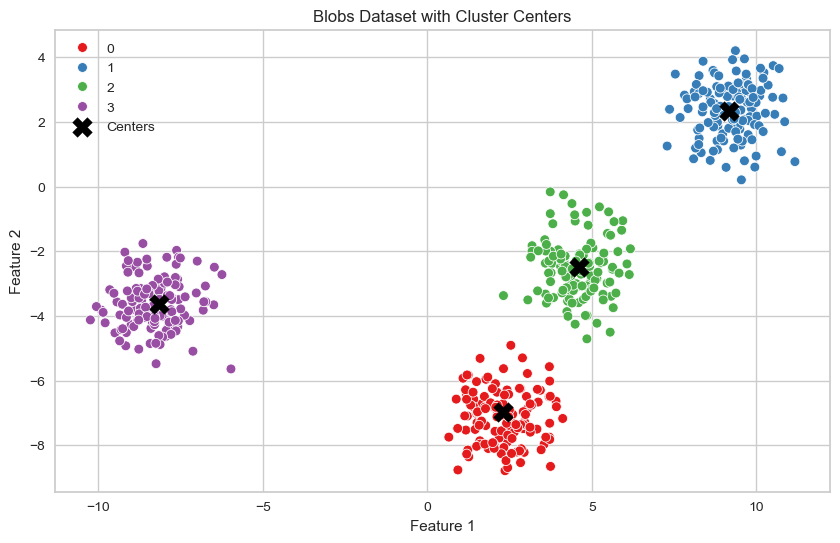

In [433]:
# visualize data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_blobs, x='Feature_1', y='Feature_2', hue='Cluster', palette='Set1', s=50)
plt.scatter(df_center['Feature_1'], df_center['Feature_2'], color='black', marker='X', s=200, label='Centers')
plt.title('Blobs Dataset with Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [434]:
model_kmeans = KMeans(n_clusters=4, random_state=7)

y_pred = model_kmeans.fit_predict(X)
df_blobs['Cluster'] = y_pred

k_means_centers = model_kmeans.cluster_centers_
df_center = pd.DataFrame(k_means_centers, columns=['Feature_1', 'Feature_2'])
df_center.head()

,Feature_1,Feature_2
0,4.558990,-2.577770
1,-8.282140,-3.639994
2,2.314264,-7.131921
3,9.212046,2.374724


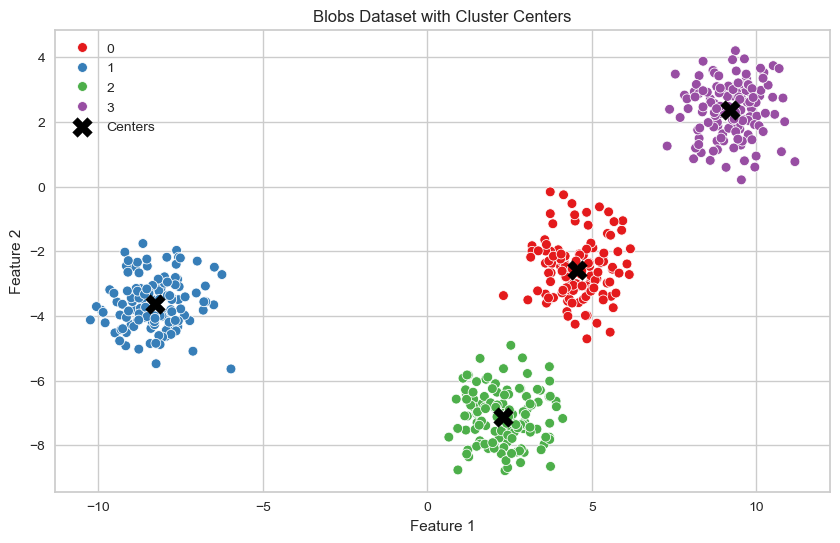

In [435]:
# visualize data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_blobs, x='Feature_1', y='Feature_2', hue='Cluster', palette='Set1', s=50)
plt.scatter(df_center['Feature_1'], df_center['Feature_2'], color='black', marker='X', s=200, label='Centers')
plt.title('Blobs Dataset with Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Find K value

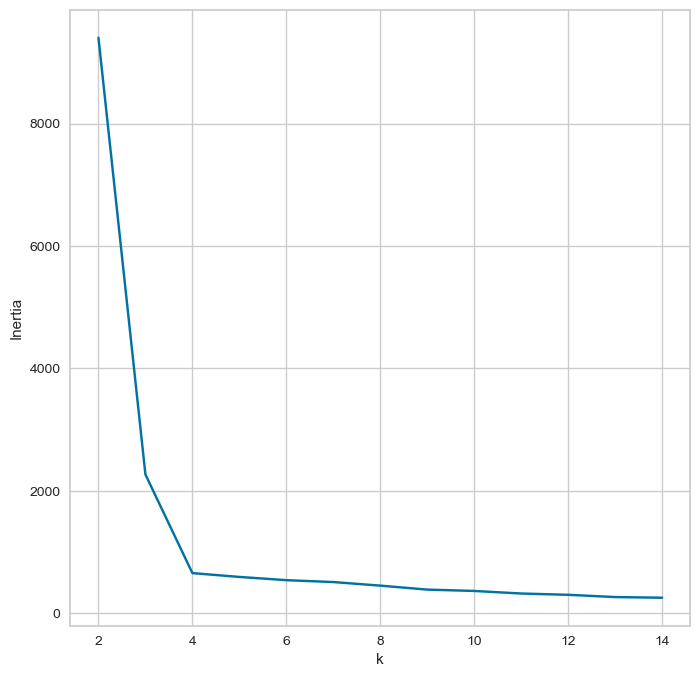

In [436]:
sum_of_squared_distances = []
K = range(2,15)
for k in K: 
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)

plt.figure(figsize=(8,8))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

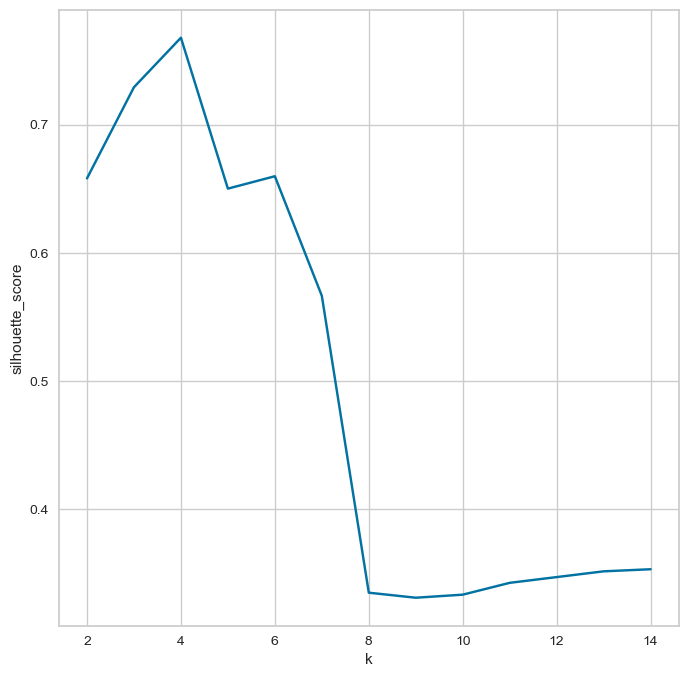

In [437]:
silhouette_scores = []
K = range(2,15)
for k in K: 
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    y = km.predict(X)
    silhouette_scores.append(silhouette_score(X,y))

plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.show()

SilhouetteVisualizer(ax=<Axes: >, colors='yellowbrick',
                     estimator=KMeans(n_clusters=4))

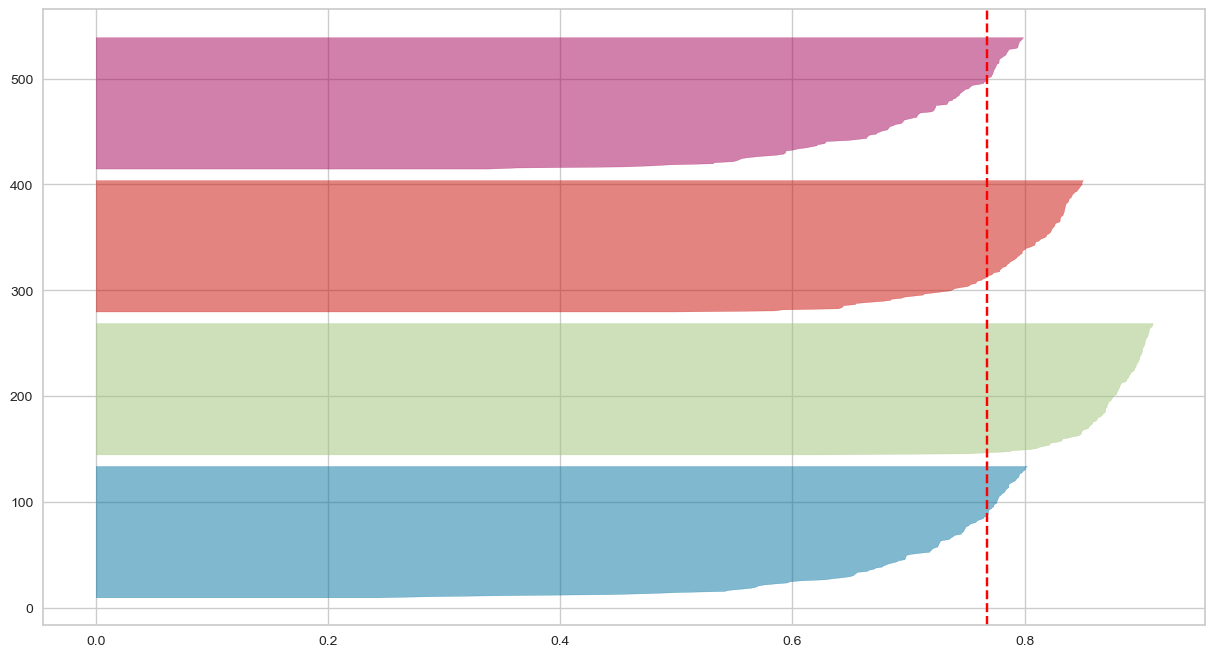

In [438]:
plt.figure(figsize=(15,8))
km = KMeans(n_clusters=4) 
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(X)